In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('income.csv')

In [2]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

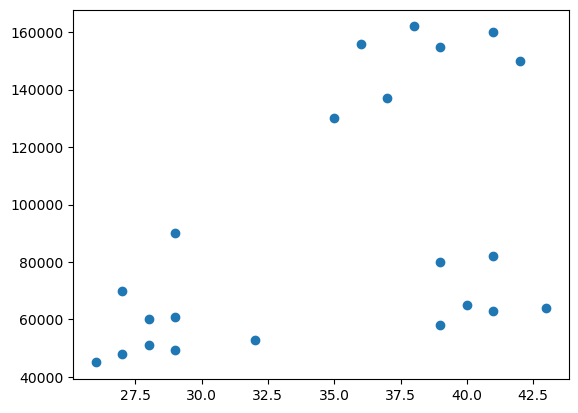

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [6]:
model.fit_predict(df[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']  =model.fit_predict(df[['Age','Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [10]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

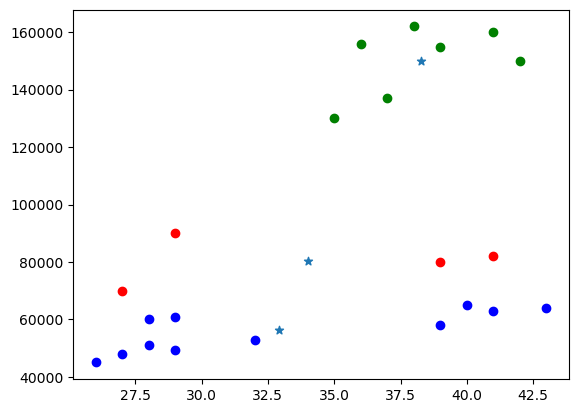

In [13]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]


plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

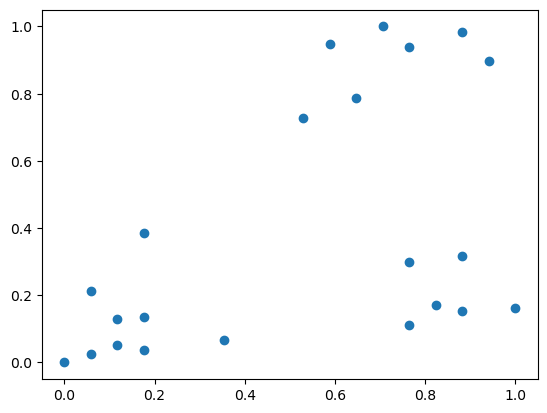

In [21]:
plt.scatter(df['Age'],df['Income($)'])

In [26]:
model1  = KMeans(n_clusters=3)
df['cluster']  = model.fit_predict(df[['Age',"Income($)"]])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


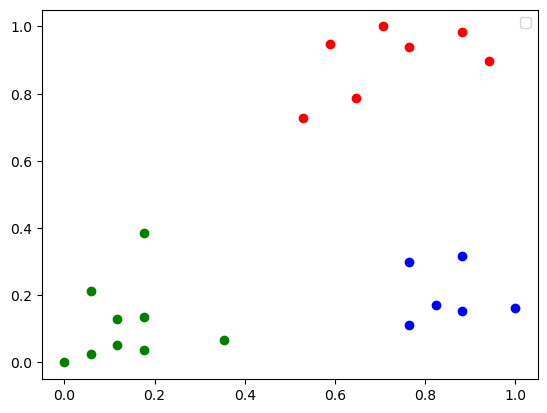

In [31]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*')


In [42]:
sse = []
for i in range(1,11):
    model3 = KMeans(n_clusters=i)
    model3.fit(df[['Age',"Income($)"]])
    sse.append(model3.inertia_)

In [43]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26217927623452136,
 0.22395807059250128,
 0.16869711728567788,
 0.14258711825476092,
 0.10383752586603559,
 0.07831232180040332]

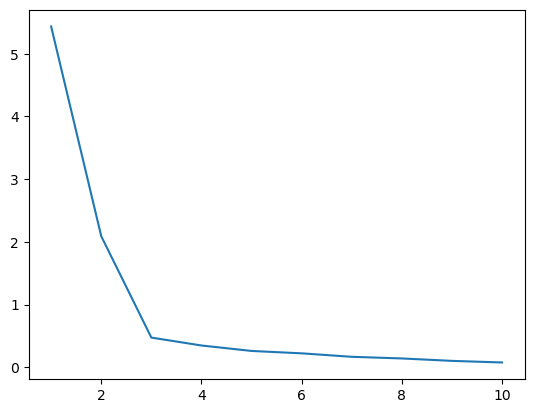

In [44]:
plt.plot(range(1,11),sse)